# **Veriyi Tanıma**

İlk adım olan "Veriyi Tanıma" aşamasında, veri setini anlamak için genel bir inceleme yapmamız gerekiyor. Bu aşamada, veri setindeki her bir niteliğin neyi temsil ettiğini, veri yapısının nasıl olduğunu ve eksik ya da hatalı verilerin olup olmadığını gözlemliyoruz.

In [ ]:
import pandas as pd

# pandas kütüphanesi ile veri setini yükleme
url = 'https://github.com/mwaskom/seaborn-data/raw/master/planets.csv'
df = pd.read_csv(url)

# İlk 5 satırı görüntüle
print(df.head())

# Veri türlerini incele
print(df.info())

# Temel istatistikler
print(df.describe())


            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None
            number  orbital_period        mass     distance         ye

# **Veri Temizleme**

Veri temizleme, veri setinde yer alan eksik, hatalı, ya da tutarsız verileri düzeltme işlemidir. Bu adımın amacı, makine öğrenmesi modellerinin doğru ve güvenilir sonuçlar üretmesini sağlamaktır.

In [ ]:
# Eksik değerleri kontrol et
print(df.isnull().sum())

# Eksik verileri ortalama, medyan veya sabit bir değerle doldurmak
df['mass'].fillna(df['mass'].mean(), inplace=True)

# Mass sütununun dağılımını inceleyelim
print(df['mass'].describe())

# Uç değerlere bakalım
print(df[df['mass'] > df['mass'].quantile(0.99)])  # 99. persentilin üzerindeki uç değerler

# Uç değerleri baskılayalım
df.loc[df['mass'] > df['mass'].quantile(0.99), 'mass'] = df['mass'].quantile(0.99)

# Year sütununu integer formatına çevirme
df['year'] = df['year'].astype(int)



method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64
count    1035.000000
mean        2.638161
std         2.687081
min         0.003600
25%         1.285000
50%         2.638161
75%         2.638161
max        25.000000
Name: mass, dtype: float64
              method  number  orbital_period   mass  distance  year
3    Radial Velocity       1        326.0300  19.40    110.62  2007
63   Radial Velocity       1        305.5000  20.60     92.51  2013
85   Radial Velocity       2        379.6300  21.42       NaN  2009
161  Radial Velocity       2        428.5000  15.20    214.00  2009
317  Radial Velocity       1          1.3283  18.37     43.03  2003
321  Radial Velocity       1       2371.0000  25.00     37.05  2008
462  Radial Velocity       1       1951.0000  18.15     57.21  2008
492  Radial Velocity       1          2.3910  15.50     76.51  2009
527  Radial Velocity       2       1749.5000  18

<ipython-input-4-dde698408c0d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mass'].fillna(df['mass'].mean(), inplace=True)


**Dağılım Grafikleri Çizdirmek**

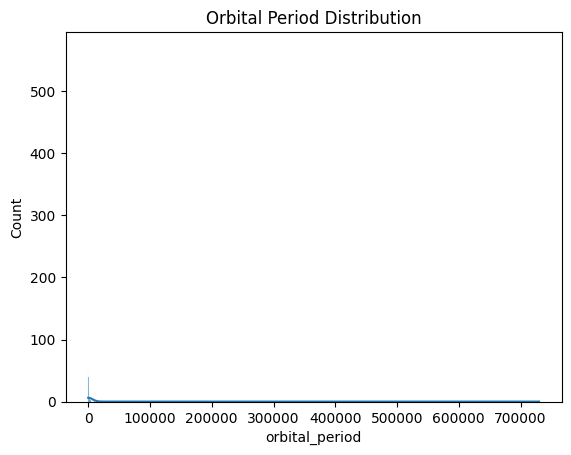

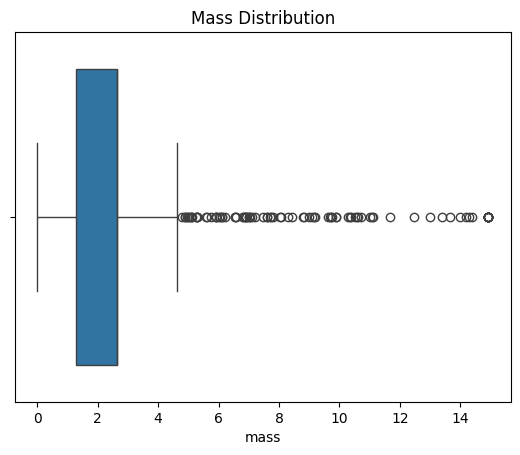

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Orbital Period sütununun dağılımı için histogram
sns.histplot(df['orbital_period'].dropna(), kde=True)
plt.title('Orbital Period Distribution')
plt.show()

# Mass sütununun dağılımı için boxplot
sns.boxplot(x=df['mass'])
plt.title('Mass Distribution')
plt.show()


**Verilerin Korelasyonuna Bakmak**

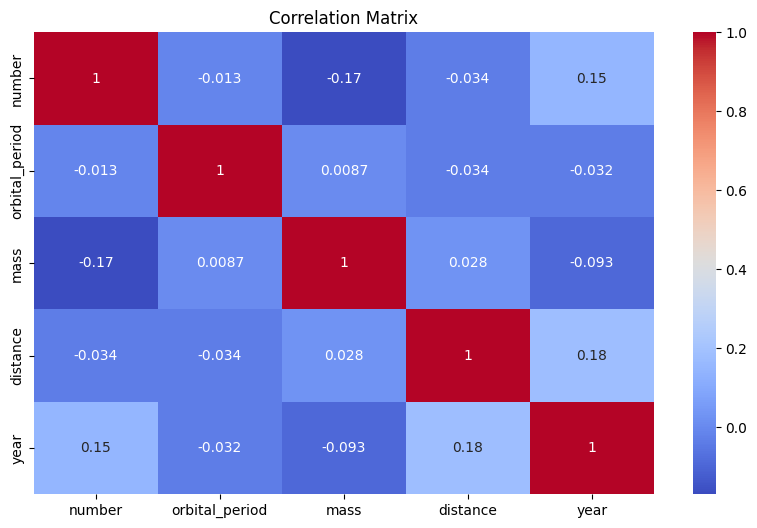

In [ ]:
# Korelasyon matrisi
# numeric_only=True parametresi eklendi
corr_matrix = df.corr(numeric_only=True)

# Korelasyon ısı haritası
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Kutu Grafiği ile Aykırı Veri Tespiti**

Adım 1: Kutu Grafiği Çizme ve Aykırı Verileri Tespit Etme

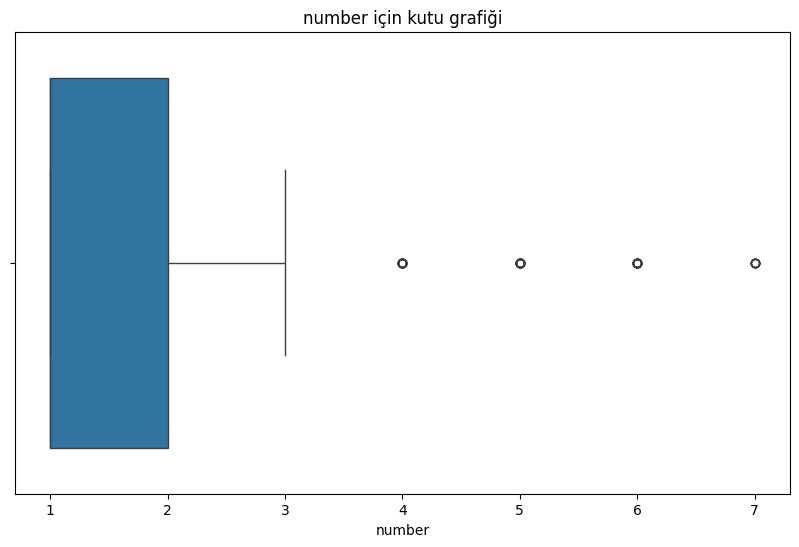

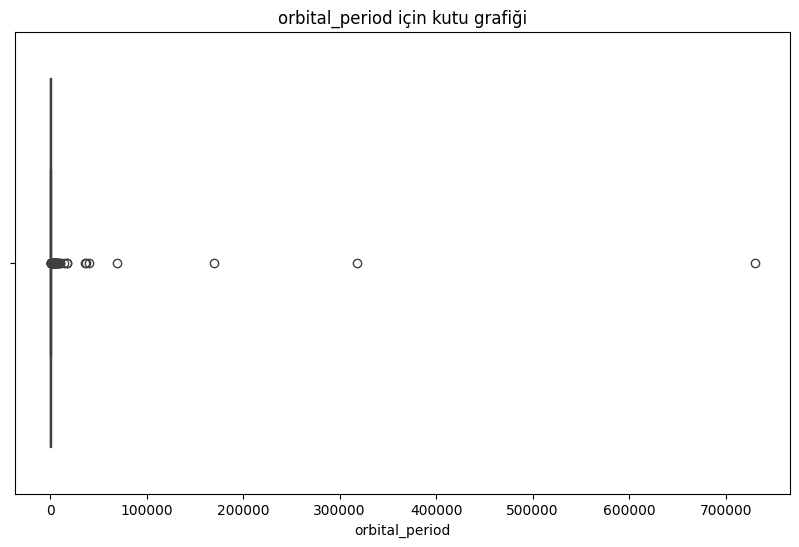

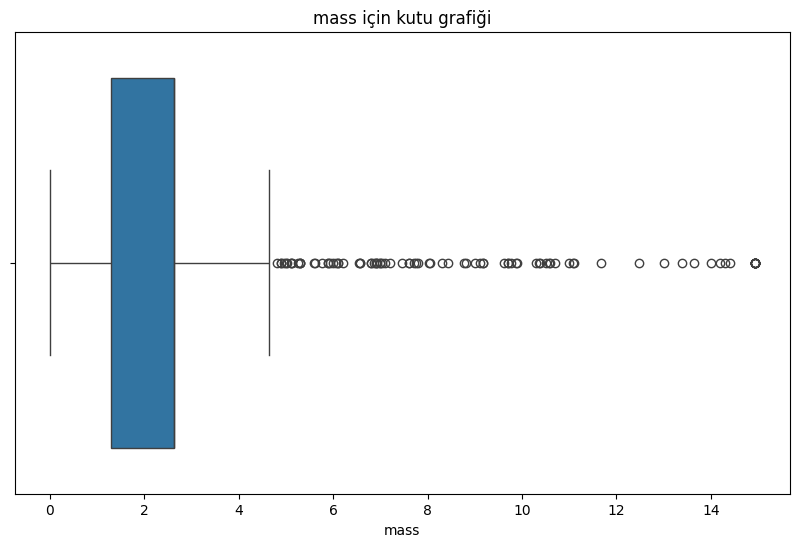

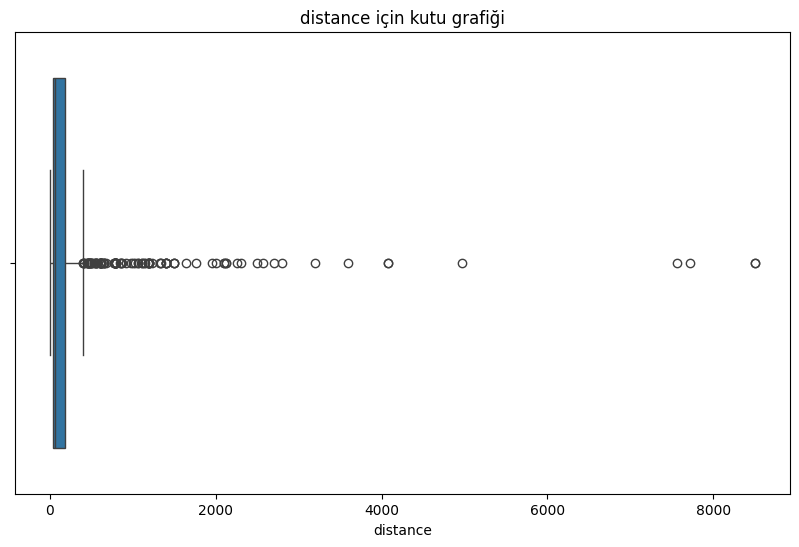

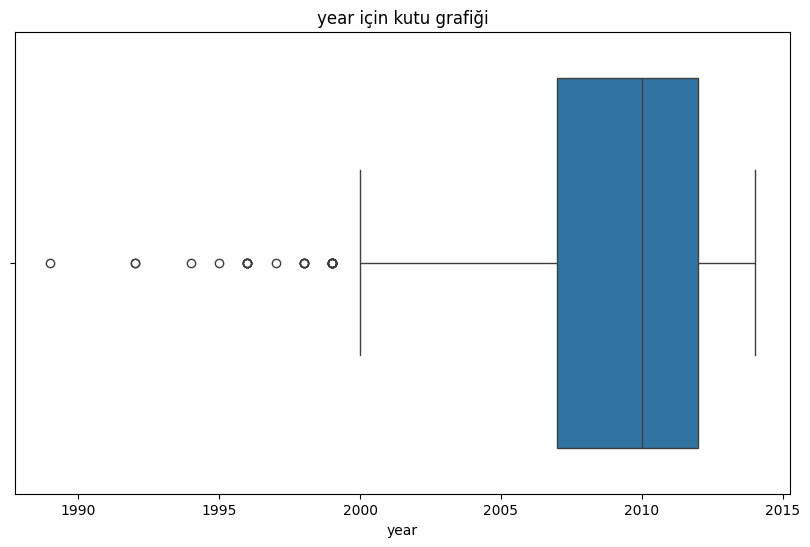

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Özniteliklerin listesini alalım
columns = df.select_dtypes(include=['float64', 'int64']).columns

# Her bir öznitelik için kutu grafiği çizdirme
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'{column} için kutu grafiği')
    plt.show()


Adım 2: Aykırı Verilere Müdahale

In [ ]:
# Aykırı değerleri bulma: mass sütunu için alt ve üst sınırları belirleme
Q1 = df['mass'].quantile(0.25)
Q3 = df['mass'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri silme
df_cleaned = df[(df['mass'] >= lower_bound) & (df['mass'] <= upper_bound)]


# **Veri Dönüşümü**

Veri dönüşümü, veriyi belirli bir formata getirmek için uygulanan adımlardan biridir ve veriyi normalize etmek, bu adımın önemli bir parçasıdır. Normalizasyon, verilerin farklı ölçeklerde olmasını önleyerek makine öğrenmesi modellerinde daha iyi performans sağlar. Bu, özellikle metrikler farklı aralıklarda olduğunda gereklidir.

Veriyi normalize etmek için, Min-Max Scaling veya Z-score gibi yöntemler kullanılabilir. Min-Max ile veriyi [0, 1] aralığına, Z-score ile ise ortalaması 0, standart sapması 1 olacak şekilde ölçeklendirebiliriz.

Min-Max Scaling yöntemiyle normalizasyon;


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Sadece sayısal öznitelikler üzerinde normalizasyon yapıyoruz
scaler = MinMaxScaler()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Sayısal sütunları normalize ediyoruz
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Normalleştirilmiş veri setini gösterelim
print(df.head())


            method  number  orbital_period      mass  distance  year
0  Radial Velocity     0.0        0.000369  0.475490  0.008948  0.68
1  Radial Velocity     0.0        0.001198  0.147838  0.006542  0.76
2  Radial Velocity     0.0        0.001045  0.173970  0.002176  0.88
3  Radial Velocity     0.0        0.000446  1.000000  0.012857  0.72
4  Radial Velocity     0.0        0.000707  0.703305  0.013899  0.80
